<a href="https://colab.research.google.com/github/FGalvao77/Previsao-de-Series-Temporais-com-a-biblioteca-Prophet-/blob/main/Previs%C3%A3o_de_S%C3%A9ries_Temporais_com_a_biblioteca_%22Prophet%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Previsão de _Séries Temporais_ com a biblioteca "Prophet"**
---
---

    "O Prophet é um procedimento de previsão implementado em Python e R. 
    É rápido e fornece previsões totalmente automatizadas que podem ser
    ajustadas manualmente por cientistas e analistas de dados."

    META

O modelo de previsão do “Prophet” é definido como:

- $y(t) = g(t) + d(t) + h(t) + e(t)$

Em que:

- $g(t)$, é a função de tendência que modela mudanças não periódicas no valor da série temporal;
- $s(t)$,  representa mudanças periódicas (por exemplo, sazonalidade semanal e anual);
- $h(t)$, representa os efeitos dos feriados que ocorrem em horários potencialmente irregulares ao longo de um ou mais dias.
- $e(t)$, representa quaisquer mudanças idiossincráticas que não são acomodadas pelo modelo.

<br>

O artigo que apresenta toda teoria do modelo de previsão do Prophet pode ser lido no  link: 
- https://peerj.com/preprints/3190v2/.

In [ ]:
import pandas as pd
from prophet import Prophet

In [ ]:
sales = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/jonates/opendata/master/vendas_walmart/sales_walmart_dataset.csv', 
    sep=',',
    decimal='.'
)

In [ ]:
sales.tail(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
421560,45,98,24/08/2012,415.40,False
421561,45,98,31/08/2012,346.04,False
421562,45,98,07/09/2012,352.44,True
421563,45,98,14/09/2012,605.96,False
421564,45,98,21/09/2012,467.30,False
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False
421569,45,98,26/10/2012,1076.80,False


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


O conjunto de dados tem 421.570 registros e 5 atributos contendo as seguintes informações:

* **Store**: número de identificação da loja;
* **Dept**: número de identificação do departamento;
* **Date**: data (representa uma semana);
* **Weekly_Sales**: vendas da semana;
* **IsHoliday**: se a semana contém feriado (False ou True).

<br>

Para construir a série temporal de vendas, precisamos realizar duas transformações:

- 1º - transformar a variável Date no tipo datetime;

- 2º - agrupar as vendas por semana, ou seja, por data. Atenção, o Prophet espera que a série temporal que vai alimentar o modelo seja um conjunto de dados com duas colunas:

 - **ds**: que significa (datastamp) deve ter um formato de datetime esperado pelo Pandas, preferencialmente no formato AAAA-MM-DD se for somente a data ou AAAA-MM-DD HH:MM:SS se for data e hora.

 - **y**: deve ter os dados observados nas datas e que se pretende prever, e ser numérica.


In [ ]:
sales['Date'] = pd.to_datetime(sales.Date, infer_datetime_format=True)

In [ ]:
sales['Date'].dtypes

dtype('<M8[ns]')

In [ ]:
grouped_weekly_sales = sales[['Date', 'Weekly_Sales']]\
    .groupby(['Date'], as_index=True)\
    .sum()\
    .reset_index()\
    .sort_values(['Date'], ascending=True)\
    .rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

In [ ]:
grouped_weekly_sales.head(15)

,ds,y
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13
5,2010-03-09,47194257.61
6,2010-03-12,49909027.88
7,2010-03-19,44988974.64
8,2010-03-26,44133961.05
9,2010-04-06,50188543.12


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
# plt.style.use('ggplot')
%matplotlib inline 

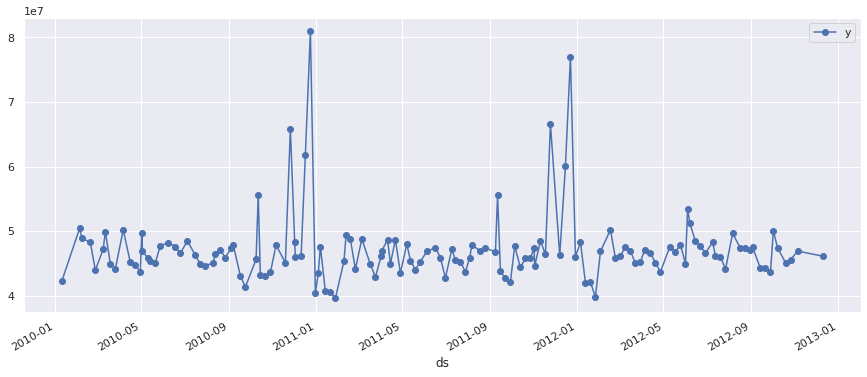

In [ ]:
grouped_weekly_sales.plot(x='ds', y='y', figsize=(15, 6), marker='o');

In [ ]:
model = Prophet()

model.fit(grouped_weekly_sales)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp53jbqed6/lu8hujbf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp53jbqed6/ssxxsby3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91289', 'data', 'file=/tmp/tmp53jbqed6/lu8hujbf.json', 'init=/tmp/tmp53jbqed6/ssxxsby3.json', 'output', 'file=/tmp/tmp53jbqed6/prophet_modelrr6c__az/prophet_model-20221125220954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:09:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:09:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model.make_future_dataframe(
    periods=8,
    freq='w',
    include_history=True
)

In [ ]:
pred_Prophet = model.predict(forecast)

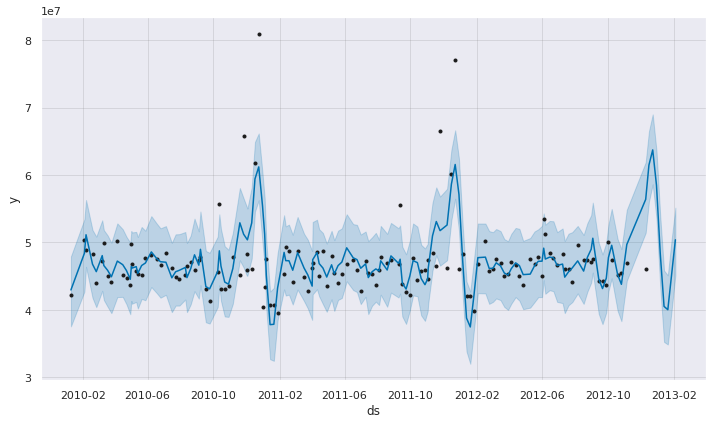

In [ ]:
graph_pred_Prophet = model.plot(fcst=pred_Prophet)

graph_pred_Prophet.show()